In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re

import nltk
from gensim.models import Word2Vec

from sklearn.decomposition import PCA

In [2]:
reviews = pd.read_csv('Processed_Data/all_reviews.csv')
reviews.head()

,Unnamed: 0,BOHEMIAN_gallery,BOHEMIAN_Gaslight,BOHEMIAN_Intelligentsia,BOHEMIAN_Ipsento,BOHEMIAN_volume,BOHEMIAN_wormhole,CORPORATE_Bageler,CORPORATE_Bourgeoi,CORPORATE_Cupitol,CORPORATE_Dollop_Loop,CORPORATE_dollop_street,CORPORATE_Intelligentsia_Loop,NEIGHBORLY_Currency,NEIGHBORLY_Dollop_Hyde,NEIGHBORLY_Kusanya,NEIGHBORLY_medici,NEIGHBORLY_Plein,NEIGHBORLY_Robust
0,0,Cozy neighborhood spot for a good coffee and y...,"So I live relatively close now, and an update ...",There's a reason why Intelligentsia is at the ...,Went here on a hot day after walking the 606. ...,It's about time I write a review for this plac...,A unique experience. Upon walking inside Wormh...,Where do I begin? I need 10 stars for this pla...,Absolutely LOVE this place. Today was my first...,This is probably my favorite coffee and eatery...,This location is very busy and there is a wait...,Happy to have found a place that locals freque...,I'm a big fan of Intelligentsia and this is on...,This restaurant has reopened as Peach's at Cur...,The coffee here is SO good. I recommend the ic...,This place deserves all the hype it gets. i've...,My friend and I came here for lunch on a Frida...,This is probably one of my favorite places to ...,"First and foremost, this place is huge! That a..."
1,1,I thought this cafe was okay. I got the matcha...,Roasted: came here because I couldn't drink th...,Always a pleasure coming to this intelli locat...,"Espresso served too hot, bean quality not impr...",Regardless of the SJW crap all over their wind...,If you like craft coffee mixed with 80's nosta...,4.5 stars. GREAT bagels and cream cheese here....,I went there today for the first time and orde...,I had breakfast here this past week. I really ...,"This place has a lot of mosquitos inside, stra...",What a delightful little coffee shop. The name...,"Anytime I come to Chicago, usually a stop to a...",Only a one star because it was closed. I've he...,I've been here three times now and I'm always ...,Really dug the decor and the coffee was excell...,I think the cheese burgers are 10 out of 10! M...,The mascarpone stuffed French toast was amazin...,I love this coffee shop because it's a nice pl...
2,2,Cute cafe that made a nice strong cortado. Fri...,Gaslight - the coffee shop designed for the ev...,While this is a short walk from me and a cute ...,Jacking'em up to a four star because at the en...,"I first heard about Volumes from a friend, the...",I love this place!! My only complaint is that ...,If you are staying in Lincoln Park and you nee...,Bourgeois just means too rich for their britch...,This cafe is very cute and crowded. It's super...,Ok super annoyed with this place. Their coffee...,The honey cinnamon latte is my favorite drink ...,"Excellent coffee, good atmosphere. Quality foo...",They literally converted a currency exchange i...,Drinks: 4Cleanliness: 4Outlets: 4Noise Level: ...,First I'd like to say thank you to Kusanya for...,The space is really nice. The girl at the fron...,*** Workspace ***Being a cafe in a university ...,Robust is such a great space to work or meet u...
3,3,Good neighborhood place for breakfast sandwich...,It's good coffee but it's a little bit overpri...,"Good coffee, but slightly steep prices. This i...",Nice coffee shop in the area. About a 5 minute...,Super cute and modern neighborhood cafe & book...,This coffee shop is the MF bomb and I love it!...,Ugh love this place! It feels so random on the...,Quality of the Pig has decreased. Atmosphere r...,I came in for breakfast with my friends on a S...,"I had a very nice cortado here this morning, a...",I happened to pass Dollop on my way to Yolk th...,Was in Chicago for a conference and went to In...,My friend and I decided to give Currency Excha...,It's a Dollop so you essentially know what to ...,I loved walking into this coffee shop. It's in...,I can't believe I haven't written a review abo...,Food: 4Service: 4Cleanliness: 4Noise Level: Qu...,So happy this gem is in my neighborhood. I've ..

In [66]:
def clean_df_to_list (df):
    """
    Cleans the data.
    
    :param df: Dataframe where each column is a business
    :type  df: pandas.core.frame.DataFrame
    :returns: 
    :rtype:   list
    """
    
    clean_df = df.drop(['Unnamed: 0'], axis=1).fillna('')
    to_np = clean_df.values.flatten()
    review_list = to_np.tolist()
    words_in_one_string = " ".join(review_list).lower()  
    return words_in_one_string

review_string = clean_df_to_list (reviews)
review_string[:600]

"cozy neighborhood spot for a good coffee and yummy sandwiches. we stopped in for a few hours to work and the wifi, the sound level and light was perfect for getting things done. if you're nice to the barista, they may make you a fun latte with funky art on it, and their latte flavors range from standard to different. the lavender one was lovely and the spicy one had just the right touch of heat. we got one of the sandwiches after a while and it came with veggie chips on a plate that looked like a painter's palette, which was fun. and the sandwich was fresh and tasty. so i live relatively close"

In [67]:
#npreviews = reviews.values.flatten()#reshape(-1,1)
#npreviews.shape

In [68]:
#npreviews = filter(lambda v: v==v, npreviews)
#reviewlist = npreviews.tolist()

In [69]:
#reviewlist[:5]
#words_in_one_string = " ".join(reviewlist).lower()
#words_in_one_string[:600]

In [70]:
def clean_string (string):
    lstring = string.lower()
    remove_num = re.sub(r"[0-9]+", " NUM ", lstring)
    return remove_num

reviews_cleaned = clean_string (review_string)
reviews_cleaned[:600]

"cozy neighborhood spot for a good coffee and yummy sandwiches. we stopped in for a few hours to work and the wifi, the sound level and light was perfect for getting things done. if you're nice to the barista, they may make you a fun latte with funky art on it, and their latte flavors range from standard to different. the lavender one was lovely and the spicy one had just the right touch of heat. we got one of the sandwiches after a while and it came with veggie chips on a plate that looked like a painter's palette, which was fun. and the sandwich was fresh and tasty. so i live relatively close"

In [93]:
def to_list_of_sentences (string):
    """
    Turn a string into a list of sentences, where each sentence is partitioned by words.
    
    :param string: string 
    :type  string: str
    :returns: list of lists of words 
    :rtype:   list
    """
    
    wnl = nltk.WordNetLemmatizer()
    sent_text = nltk.sent_tokenize(string)
    #print (sent_text[1])
    sent_text = [re.sub('[()!@%^&-+\$.?*"#\xa0]', ' ', sentence) for sentence in sent_text]
    print (sent_text[1])
    sentences = []
    for sentence in sent_text:
        tokenized_text = nltk.word_tokenize(sentence)
        lemmatized_text = [wnl.lemmatize(t) for t in tokenized_text]
        sentences.append(lemmatized_text)
        #tagged = nltk.pos_tag(tokenized_text)
        #print(tagged)
    return (sentences)

sentences = to_list_of_sentences (reviews_cleaned)
sentences[:1]

we stopped in for a few hours to work and the wifi, the sound level and light was perfect for getting things done 


[['cozy',
  'neighborhood',
  'spot',
  'for',
  'a',
  'good',
  'coffee',
  'and',
  'yummy',
  'sandwich']]

In [101]:
def create_word2vec_model (sentences):
    """
    Create the word2vec model and the words used.
    
    :param sentences: list of lists of words 
    :type  sentences: list
    :return: (model generated from gensim, list of words)
    :rtype:  (gensim.models.word2vec.Word2Vec, list)
    """
    model = Word2Vec(sentences, 
                 min_count=10, 
                 sg=0, # 0 for CBOW, 1 for skip gram
                 size=100,
                 window=5)
    words = list(model.wv.vocab)
    
    print (model)
    return (model, words)

In [102]:
model, words = create_word2vec_model (sentences)

Word2Vec(vocab=1884, size=100, alpha=0.025)


In [103]:
words[:10]

['cozy',
 'neighborhood',
 'spot',
 'for',
 'a',
 'good',
 'coffee',
 'and',
 'yummy',
 'sandwich']

In [104]:
def dim_reduction (model, dim=2):
    """
    Reduce dimension of vectors for visualization
    
    :param model: model generated from gensim
    :type  model: gensim.models.word2vec.Word2Vec
    :param dim: Number of dimensions
    :type  dim: int
    :returns: An array of (instances, dim)
    :rtype:   numpy.ndarray
    """
    X = model[model.wv.vocab] #  retrieve all of the vectors from a trained model
    
    # TSNE
    #from sklearn.manifold import TSNE
    #tsne = TSNE(n_components=2, random_state=42)
    #X_reduced_tsne = tsne.fit_transform(X)
    
    # For PCA reduction instead
    pca = PCA(n_components=dim)
    X_reduced_PCA = pca.fit_transform(X)
    return X_reduced_PCA
result = dim_reduction(model)
result.shape

/Users/jinli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


(1884, 2)

In [105]:
type(result)

numpy.ndarray

In [106]:
def filter_words (nparray, words,
                  csv_common, csv_include, csv_google, 
                  max_google=20000):
    """
    Remove words from a list and remove the corresponding np coordinate.
    
    :param nparray: An array of (instances, dim)
    :type  nparray: numpy.ndarray
    :param words: list of words
    :type  words: list
    :param csv_common: csv file of common words to exclude
    :type  csv_common: str
    :param csv_include: csv file of words to include
    :type  csv_include: str
    :param csv_google: csv file of words to exclude
    :type  csv_google: str
    :param max_google: Maximum number of words taken from google file
    :type  max_google: int
    :returns: (numpy array, filtered words)
    :rtype:   (numpy.ndarray, list)
    """
    
    index_of_removed_words = []
    remaining_words = []
    
    common_words = set (pd.read_csv (csv_common)['WORDS'].values)
    key_words = set (pd.read_csv (csv_include)['WORDS'].values)
    google_words = set (
        pd.read_csv (csv_google)[:max_google]['WORDS'].values)
    
    #print (key_words)
    for (i, word) in enumerate (words):
        if not (word in google_words) and not (word in common_words) or \
            (word in key_words):
            remaining_words.append(word)
            index_of_removed_words.append(i)
    
    filtered_np_array = nparray[index_of_removed_words]
    return (filtered_np_array, remaining_words)

filtered_result, filtered_words = filter_words (
    result, 
    words, 
    'Word_Lists/commonwords.csv',
    'Word_Lists/keywords.csv',
    'Word_Lists/20k.csv'
    #'Word_Lists/google-10000-english-usa.csv'
    )
#[word for word in filtered_words if r'\w' not in word]
filtered_words

['neighborhood',
 'coffee',
 'wifi',
 ',',
 'barista',
 'latte',
 'art',
 'veggie',
 'food',
 'table',
 'aren',
 'espresso',
 'intelligentsia',
 'oat',
 'baristas',
 'seating',
 'iced',
 'nutella',
 'tasted',
 'donut',
 'working',
 'matcha',
 'comfy',
 'wormhole',
 'music',
 'bageler',
 'isn',
 'event',
 'chai',
 'gatsby',
 'streeterville',
 'hangout',
 'friend',
 'ipad',
 'dollop',
 'to-go',
 'tucked',
 'ambiance',
 'disappoint',
 'niece',
 'grit',
 'vibe',
 'wasn',
 'flavorful',
 'couldn',
 'bourbon',
 'mocha',
 'meeting',
 'studying',
 'medici',
 'hearty',
 'baguette',
 'milkshake',
 'blueberry',
 'space',
 'accommodating',
 'didn',
 'lighting',
 'style',
 'pour-over',
 'koopa',
 'troopa',
 'brewed',
 'delorean',
 'bagel',
 'doesn',
 'burrito',
 'avocado',
 ';',
 'yelp',
 'wouldn',
 'hazelnut',
 'kusanya',
 'brioche',
 'craving',
 'uchicago',
 'plein',
 'beignet',
 'cortado',
 'gaslight',
 'pricey',
 'go-to',
 'croissant',
 'buttery',
 'bagelers',
 'coffeehouse',
 'chipotle',
 'cris

In [107]:
len (filtered_words)
#common_words = set (
#    pd.read_csv ('Word_Lists/google-10000-english-usa.csv')[:5000]['WORDS'].values)
#['google-10']#.values.tolist()
#common_words#.head()

228

In [108]:
print (len (filtered_result), len(filtered_words ))

228 228


In [110]:
#filtered_words

In [111]:
model.similarity('coffee', 'latte')

/Users/jinli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/Users/jinli/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.3328476

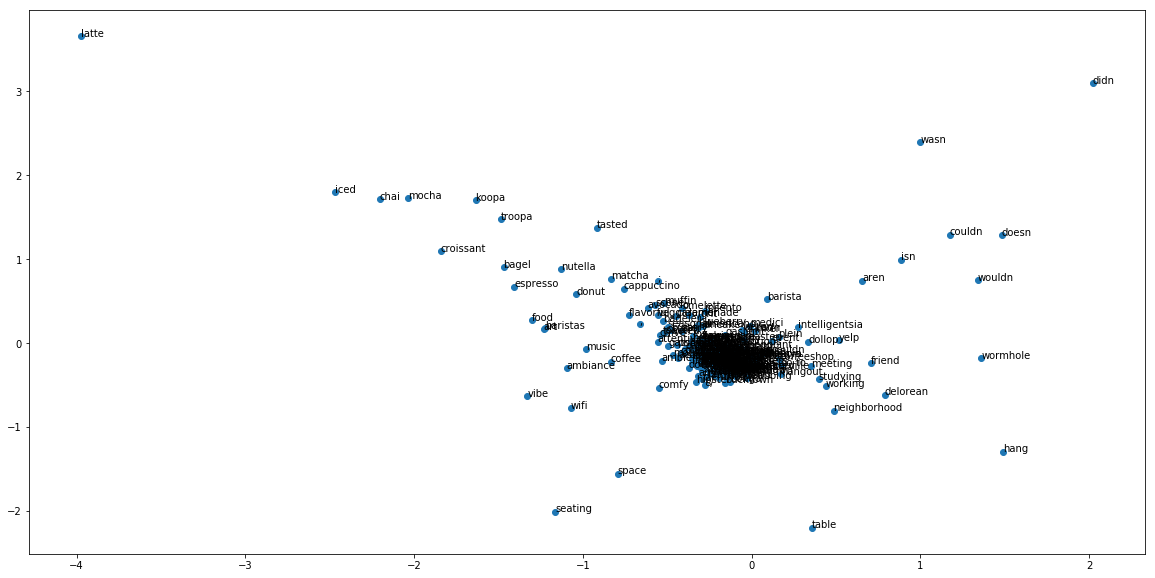

In [112]:
def create_scatter (np_array, words):
    """
    Create a scatter plot with words as labels.
    
    :param np_array: numpy array
    :type  np_array: numpy.ndarray
    :param words: list of words
    :type  words: list
    """
    
    plt.scatter(np_array[:, 0], np_array[:, 1])
    for i, word in enumerate(words):
        plt.annotate(word, xy=(np_array[i, 0], np_array[i, 1]))
    fig = plt.gcf()
    fig.set_size_inches(20,10)
    plt.savefig('Gensim_Models/Word_Embedding_Plot.jpg')
    plt.show()
    
create_scatter(filtered_result, filtered_words)

In [ ]:
import re
line = 'I paid 3.45 for this and $2 for that'
line2 = re.sub(r"[0-9|.]+", "[NUM]", line)
print (line,'\n', line2)

In [ ]:
#model.save('model.bin')

In [ ]:
#new_model = Word2Vec.load('model.bin')

In [ ]:
#X = model[model.wv.vocab]